## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv", sep=',')

In [3]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
# можно заметить, что пропусков нет, так как все поля non-null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
status                     1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
amount                     1000 non-null int64
savings                    1000 non-null object
employment_duration        1000 non-null object
installment_rate           1000 non-null object
personal_status_sex        1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null object
property                   1000 non-null object
age                        1000 non-null int64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
number_credits             1000 non-null object
job                        1000 non-null object
people_liable              1000 non-null object
telephone                  1000 n

## Количественные признаки

In [7]:
data[['duration', 'amount', 'age']]

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38
...,...,...,...
995,24,1987,21
996,24,2303,45
997,21,12680,30
998,12,6468,52


## Бинарные признаки

In [8]:
data[['telephone', 'foreign_worker', 'credit_risk']]

,telephone,foreign_worker,credit_risk
0,no,no,good
1,no,no,good
2,no,no,good
3,no,yes,good
4,no,yes,good
...,...,...,...
995,no,no,bad
996,no,no,bad
997,yes (under customer name),no,bad
998,yes (under customer name),no,bad


## Порядковые признаки

In [9]:
data[['status', 'savings', 'employment_duration', 'installment_rate', 'number_credits', 'people_liable']]

,status,savings,employment_duration,installment_rate,number_credits,people_liable
0,no checking account,unknown/no savings account,< 1 yr,< 20,1,0 to 2
1,no checking account,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,2-3,3 or more
2,... < 0 DM,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,1,0 to 2
3,no checking account,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,2-3,3 or more
4,no checking account,unknown/no savings account,1 <= ... < 4 yrs,< 20,2-3,0 to 2
...,...,...,...,...,...,...
995,no checking account,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1,3 or more
996,no checking account,unknown/no savings account,>= 7 yrs,< 20,1,0 to 2
997,... >= 200 DM / salary for at least 1 year,... >= 1000 DM,>= 7 yrs,< 20,1,0 to 2
998,... < 0 DM,... >= 1000 DM,unemployed,25 <= ... < 35,1,0 to 2


## Категориальные признаки

In [10]:
data[['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'present_residence', 'property',
     'other_installment_plans', 'housing', 'job']]

,credit_history,purpose,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,job
0,all credits at this bank paid back duly,car (used),female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,skilled employee/official
1,all credits at this bank paid back duly,others,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,skilled employee/official
2,no credits taken/all credits paid back duly,retraining,female : non-single or male : single,none,>= 7 yrs,unknown / no property,none,for free,unskilled - resident
3,all credits at this bank paid back duly,others,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,unskilled - resident
4,all credits at this bank paid back duly,others,male : married/widowed,none,>= 7 yrs,car or other,bank,rent,unskilled - resident
...,...,...,...,...,...,...,...,...,...
995,no credits taken/all credits paid back duly,furniture/equipment,male : married/widowed,none,>= 7 yrs,unknown / no property,none,for free,unskilled - resident
996,no credits taken/all credits paid back duly,others,male : married/widowed,co-applicant,< 1 yr,unknown / no property,none,rent,skilled employee/official
997,all credits at this bank paid back duly,others,male : married/widowed,none,>= 7 yrs,real estate,none,own,manager/self-empl./highly qualif. employee
998,no credits taken/all credits paid back duly,furniture/equipment,male : married/widowed,none,< 1 yr,real estate,none,rent,manager/self-empl./highly qualif. employee


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [11]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [12]:
len(data[(data.age < 30) & (data.housing == 'rent')]) / len(data[(data.age < 30)]) * 100

66.66666666666666

In [13]:
len(data[(data.age > 40) & (data.housing == 'rent')]) / len(data[(data.age > 40)]) * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [14]:
data['number_credits'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [15]:
len(data[(data.foreign_worker == 'yes') & ((data.number_credits == '4-5') | (data.number_credits == '>= 6'))])

1

### Задание 6 (1 балл)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

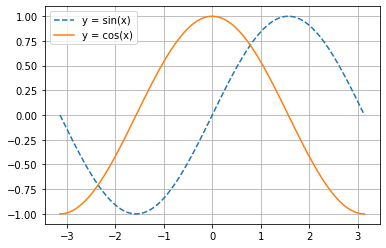

In [17]:
x = np.linspace(-np.pi, np.pi, 100, endpoint=True)
plt.grid(True, which='both') # сетка

plt.plot(x, np.sin(x), label='y = sin(x)', linestyle='--')
plt.plot(x, np.cos(x), label='y = cos(x)')
plt.legend()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

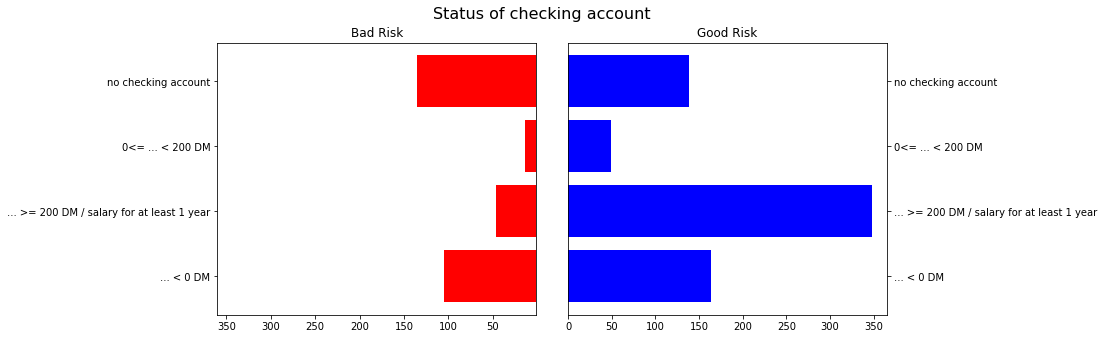

In [18]:
fig, axes = plt.subplots(ncols=2, sharey=False, figsize=(12,5))
plt.subplots_adjust(wspace = 0.1)

v_c1 = data[data.credit_risk == 'good']['status'].value_counts(sort=False).sort_index()
v_c2 = data[data.credit_risk == 'bad']['status'].value_counts(sort=False).sort_index()

axes[0].set_xlim(360)
axes[1].barh(v_c1.keys(), v_c1.values,align='center', color='blue')
axes[0].barh(v_c2.keys(), v_c2.values,align='center', color='red')

axes[1].yaxis.tick_right() # перенос подписей игреков вправо для удобства

fig.suptitle('Status of checking account', fontsize=16)
axes[1].set_title('Good Risk')
axes[0].set_title('Bad Risk')

plt.show()

### Задание 8  (0.5 балла)

In [19]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

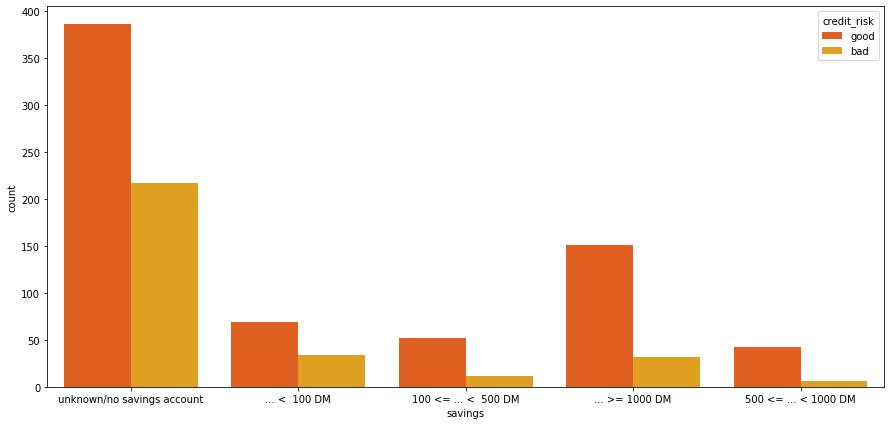

In [20]:
fig, ax = plt.subplots(figsize=(15, 7)) # matplotlib для установки размерности

sns.countplot(data=data, x='savings', hue='credit_risk', palette='autumn', ax=ax)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

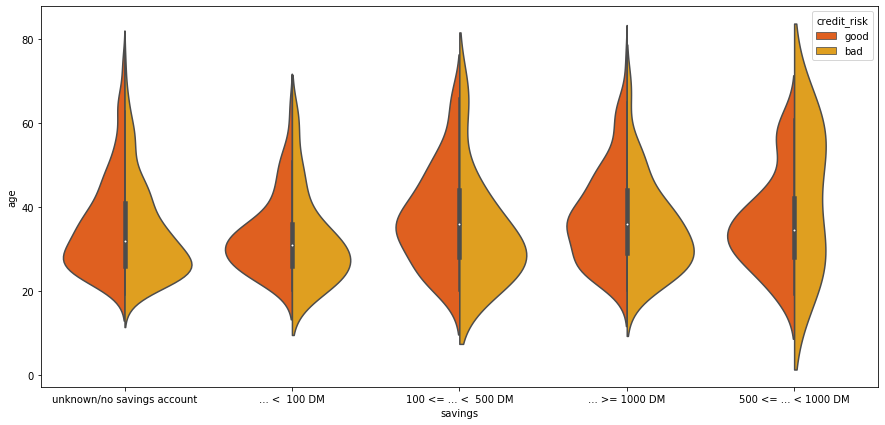

In [21]:
fig, ax = plt.subplots(figsize=(15, 7)) # matplotlib для установки размерности

sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True, ax=ax, palette='autumn')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

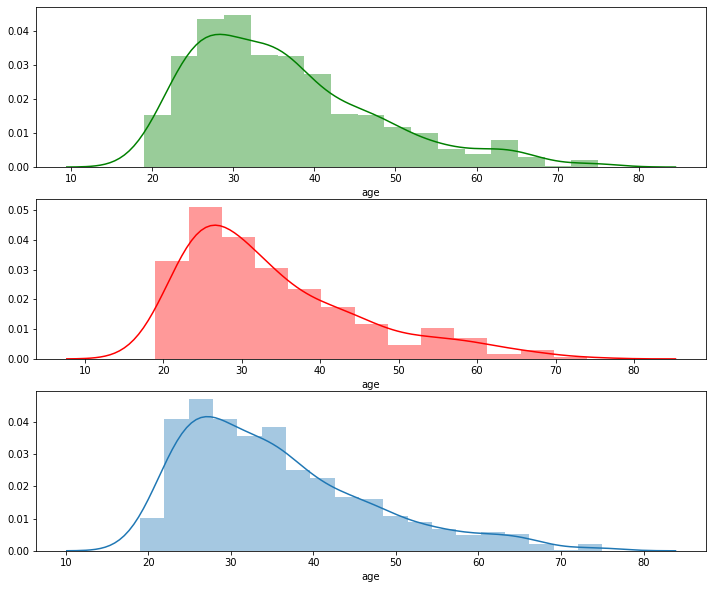

In [22]:
fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(12,10))

sns.distplot(data[data.credit_risk == 'good']['age'], kde=True, ax=axes[0], color='green')
sns.distplot(data[data.credit_risk == 'bad']['age'], kde=True, ax=axes[1], color='red')
sns.distplot(data['age'], kde=True, ax=axes[2])

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

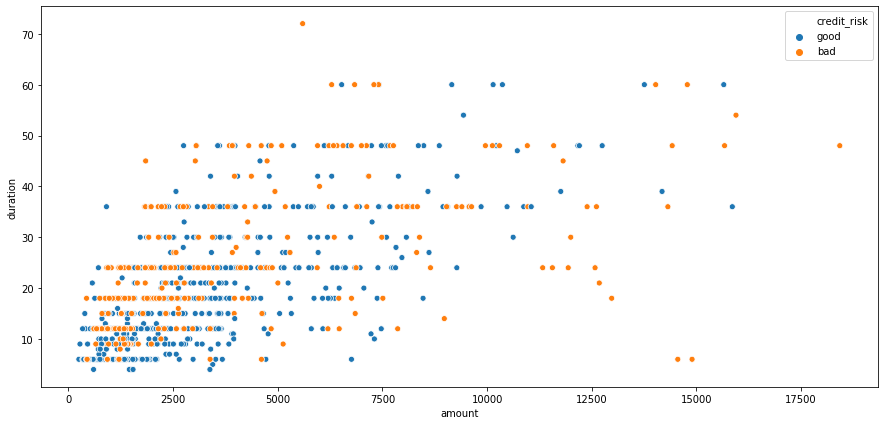

In [23]:
fig, ax = plt.subplots(figsize=(15, 7)) # matplotlib для установки размерности
sns.scatterplot(data=data, y='duration', x='amount', hue='credit_risk', ax=ax)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

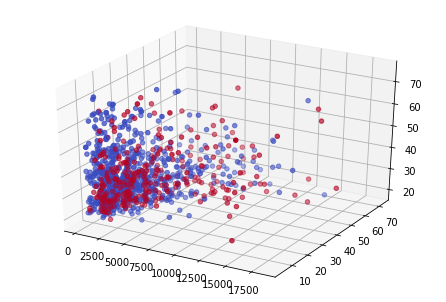

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig) 

ax.scatter(data['amount'], data['duration'], data['age'], c=(data['credit_risk'] == 'bad'), cmap = 'coolwarm')

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['age'] = pd.cut(data['age'].astype(int), 3)
data['amount'] = pd.cut(data['amount'].astype(int), 3)
data['age'] = label.fit_transform(data['age'])
data['amount'] = label.fit_transform(data['amount'])
new_data = pd.get_dummies(data.drop('credit_risk', 1))
new_data['credit_risk'] = data['credit_risk'].apply(lambda x: 1 if x == 'good' else 0)

new_data.head(10)

,duration,amount,age,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,...,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes,credit_risk
0,18,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,9,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,1,0,1,0,1
2,12,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,1
3,12,0,1,0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,1
4,12,0,1,0,0,0,1,1,0,0,...,0,0,1,1,0,1,0,0,1,1
5,10,0,1,0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,1
6,8,0,1,0,0,0,1,1,0,0,...,0,0,1,1,0,1,0,0,1,1
7,6,0,1,0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,1
8,18,0,2,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,1
9,24,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [26]:
coeffs = np.array([-0.1, -0.7, -0.5, -0.3, 0.5, 0.3, -0.5, 2, -2, -1.5, 1.5, 0.1, 2, 1, 0.7, 0.7, 
                   0, 0, 0, 0, 0, 0, -0.2, 1, 0.1, 0.5, -0.7, -0.1, 0.3, -0.5, 0.5, -1, 0.5, -0.1, 
                   1, -1, 0.5, -1, -0.5, 0.5, 0.5, 1, -0.5, -0.1, 0.2, -1, 1, 1, 0.5, 0.7, -1, 0.5, 
                   -0.5, 0, 0, 1, -0.2, 1, 0.5, 0.1, 0, 1, 0.7, -0.5, -0.2, -0.5, 0.5, 0, 0.2, 0.5, -0.5]).T

# функция для замены численных параметров риска на 1 или 0
def normalize(data):
    return 1 if data >= -2 else 0

# используем простую линейную модель с коэффициентами
def predict(Xtest: np.array) -> np.array:
    return np.array(list(map(normalize, Xtest.dot(coeffs))))

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = new_data.drop('credit_risk', 1).values
y = new_data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
print(predict(X_test))
print(y_test)
accuracy_score(y_test, predict(X_test))

[0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1]
[0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1

0.676